**<h3>Importação das bibliotecas que serão utilizadas</h3>**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot
from IPython.display import Image
cf.go_offline() # Para que os dados sejam visualizados no Jupyter Notebook precisamos desabilitar o modo offline

<h3>Planilhas</h3>

In [7]:
df_FNT = pd.read_excel ('STG_FNT_ITT.xlsx', delimiter = ';')
df_PGT = pd.read_excel ('STG_PGT.xlsx', delimiter = ';')
df_FNT_ITT = pd.read_excel ('STG_FNT_ITT.xlsx', delimiter = ';')
df_MVT_CRD = pd.read_excel ('STG_MVT_CRD.xlsx', delimiter = ';')

<h3>Função para eliminar dados duplicados</h3>

In [9]:
def del_duplicates (x):
    x = x.drop_duplicates()
    return x

<h3>Trabalhando com a Planilha de Informações sobre as Operações</h3>

In [10]:
df_OPR_ITT = pd.read_excel ('STG_OPR_ITT.xlsx', delimiter = ';')
df_OPR_ITT = del_duplicates (df_OPR_ITT)
df_OPR_ITT

,ID_STG_OPR_ITT,VLR_CTRD_CSC,QTD_PCL,VLR_SDO_DDR,QTD_CLI_CAD_POS,QTD_OPR,ID_FNT_ITT,ID_MDL,DES_TIP_PSS,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,1,NaN,45,NaN,341,358,67,A04,F,2020-01-16,2020-01-27 10:49:48.15
1,2,NaN,63,NaN,103,108,67,B99,F,2020-01-16,2020-01-27 10:49:48.15
2,3,NaN,22,NaN,15,16,67,B05,F,2020-01-16,2020-01-27 10:49:48.15
3,4,NaN,48,NaN,9,9,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
4,5,NaN,290,NaN,3,3,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
...,...,...,...,...,...,...,...,...,...,...,...
886,887,85699650.0,105,57998876.0,14,15,67,C01,F,2020-01-16,2020-01-27 10:49:48.15
887,888,NaN,228,NaN,7,7,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
888,889,NaN,52,NaN,1,1,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
889,890,NaN,182,NaN,1,1,67,B03,F,2020-01-16,2020-01-27 10:49:48.15


In [11]:
#Contabiliza valores nulos 
nulo_id_opr = df_OPR_ITT['ID_STG_OPR_ITT'].isnull().sum()
nulo_qtd_pcl = df_OPR_ITT['QTD_PCL'].isnull().sum()
nulo_qtd_cad = df_OPR_ITT['QTD_CLI_CAD_POS'].isnull().sum()
nulo_qtd_opr = df_OPR_ITT['QTD_OPR'].isnull().sum()
nulo_id_mdl = df_OPR_ITT['ID_MDL'].isnull().sum()

#visualização dos dados nulos
nulo_total = pd.DataFrame([nulo_id_opr, nulo_qtd_pcl, nulo_qtd_cad, nulo_qtd_opr, nulo_id_mdl], 
                          index=['ID da fonte',
                                'Quantidade de parcelas',
                                'Quantidade de CNPJs/CPFs distintos',
                                'Quantidade de operações únicas',
                                'Modalidade de operação'],
                          columns=['Quantidade de dados nulos'])
nulo_total

,Quantidade de dados nulos
ID da fonte,0
Quantidade de parcelas,0
Quantidade de CNPJs/CPFs distintos,0
Quantidade de operações únicas,0
Modalidade de operação,0


In [12]:
# Dados Totais da Operações
val_total_ct_cons = df_OPR_ITT['VLR_CTRD_CSC'].sum()
val_total_pcl = df_OPR_ITT['QTD_PCL'].sum()
val_total_vlr_sdo_ddr = df_OPR_ITT['VLR_SDO_DDR'].sum()
val_total_qtd_cli_cad_pos = df_OPR_ITT['QTD_CLI_CAD_POS'].sum()
val_total_qtd_opr = df_OPR_ITT['QTD_OPR'].sum()


tot_OPR = pd.DataFrame([val_total_ct_cons, val_total_pcl, val_total_vlr_sdo_ddr,val_total_qtd_cli_cad_pos,val_total_qtd_opr], 
                          index=['Valor Total do Contrato (Consórcio)',
                                'Quantidade de parcelas',
                                'Valor do Contrato Pendente',
                                'Quantidade de CPFs/CNPJs distintos',
                                'Quantidade de operações distintas'],
                          columns=['Valores Totais da Remessa'])
tot_OPR

,Valores Totais da Remessa
Valor Total do Contrato (Consórcio),6.911878e+10
Quantidade de parcelas,9.407900e+04
Valor do Contrato Pendente,3.962024e+10
Quantidade de CPFs/CNPJs distintos,6.383170e+05
Quantidade de operações distintas,7.856540e+05


ID_MDL
A01    122
A04    112
A05     20
A99     35
B01     19
B03    214
B05     71
B06      4
B07      2
B99    104
C01    186
F01      1
G01      1
dtype: int64


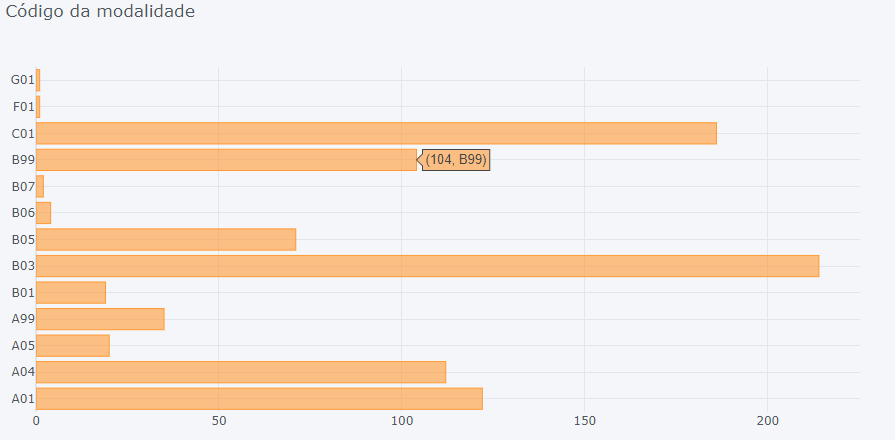

In [36]:
#Tabela: Modalidade da Operação
categoria = df_OPR_ITT.groupby(by='ID_MDL').size()
print (categoria)
grafico_categoria =categoria.iplot(asFigure=True, kind="barh",title = "Código da modalidade",color = "orange")
grafico_categoria.show()

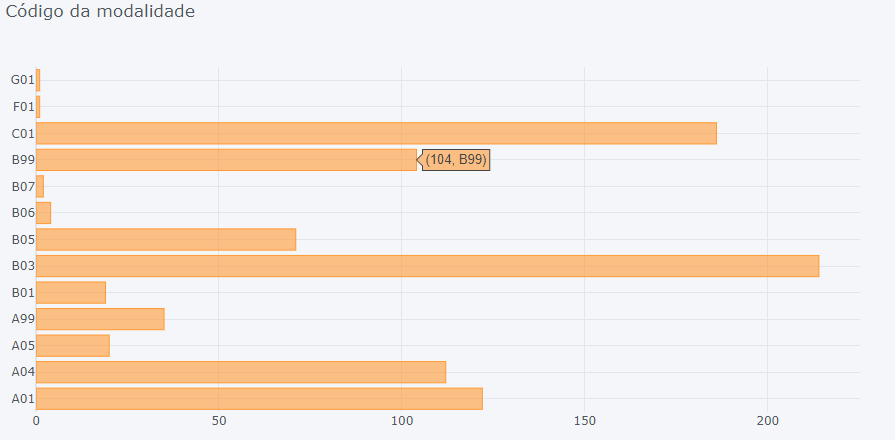

In [37]:
Image(filename='grafico_cod_modalidade.png')

In [40]:
#Verifica o tipo do cliente (Física - F ou Jurídica - J) e contabiliza erro, se estiver fora da adequação

pes_fis = 0
pes_jur = 0
erro_pes = 0

for index, row in df_OPR_ITT.iterrows():
    if str(row['DES_TIP_PSS']).upper() == "F":
        pes_fis +=1
    elif str(row['DES_TIP_PSS']).upper() == "J":
        pes_jur +=1
    else:
        erro_pes +=1
        
        
tip_cli = pd.DataFrame([pes_fis,pes_jur,erro_pes], 
                          index=['Pessoa Física',
                                'Pessoa Jurídica',
                                'Erro'],
                          columns=['Quantidade'])
tip_cli

,Quantidade
Pessoa Física,891
Pessoa Jurídica,0
Erro,0


In [39]:
#Visualização gráfica do Tipo de Cliente
labels = ['Pessoa Física','Pessoa Jurídica','Erro']
values = [pes_fis, pes_jur, erro_pes]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title_text="Tipo de Cliente")

fig.show()

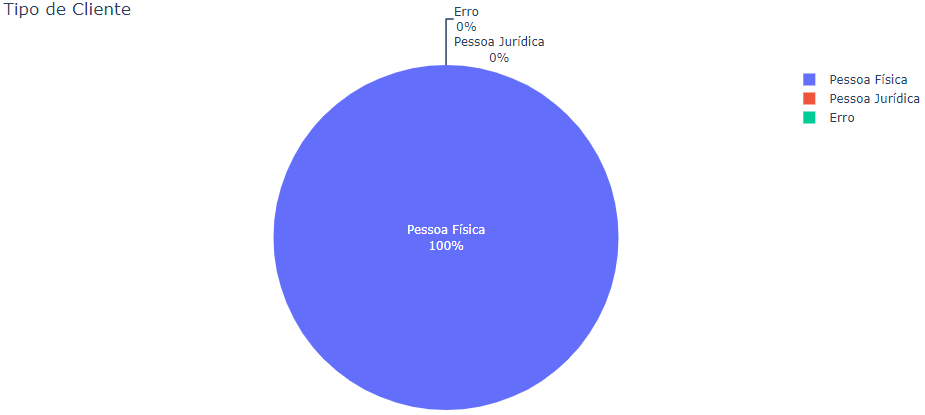

In [38]:
Image(filename='grafico_tipo_cliente.png')